# 1. Install libraries

In [13]:
pip install pandas seaborn matplotlib scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.


# 2. import and clean Data

In [11]:
import pandas as pd
import seaborn as sns
from typing import Tuple

def load_data() -> pd.DataFrame:
    """
    Load the Titanic dataset from seaborn.
    
    Returns:
        pd.DataFrame: The Titanic dataset
    """
    return sns.load_dataset("titanic")

def create_final_dataframe(df: pd.DataFrame) -> Tuple[pd.DataFrame, dict]:
    """
    Create a final cleaned DataFrame with all necessary transformations.
    
    Args:
        df (pd.DataFrame): The Titanic dataset
        
    Returns:
        Tuple[pd.DataFrame, dict]: Final cleaned DataFrame and cleaning statistics
    """
    # Initialize statistics dictionary
    stats = {
        'original_rows': len(df),
        'missing_values': {},
        'cleaned_rows': 0
    }
    
    # Calculate missing values before cleaning
    stats['missing_values']['before'] = df.isnull().sum().to_dict()
    
    # Create a copy of the original DataFrame
    final_df = df.copy()
    
    # 1. Handle missing values
    # For age, fill with median grouped by sex and class
    final_df['age'] = final_df.groupby(['sex', 'class'])['age'].transform(lambda x: x.fillna(x.median()))
    
    # For embarked and embark_town, fill with mode
    final_df['embarked'] = final_df['embarked'].fillna(final_df['embarked'].mode()[0])
    final_df['embark_town'] = final_df['embark_town'].fillna(final_df['embark_town'].mode()[0])
    
    # For deck, first convert to string, then fill with 'U'
    final_df['deck'] = final_df['deck'].astype(str)
    final_df['deck'] = final_df['deck'].replace('nan', 'U')
    
    # 2. Remove rows with missing fare (only 1 row)
    final_df = final_df.dropna(subset=['fare'])
    
    # 3. Handle outliers in fare
    Q1 = final_df['fare'].quantile(0.25)
    Q3 = final_df['fare'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    final_df['fare'] = final_df['fare'].clip(lower=lower_bound, upper=upper_bound)
    
    # 4. Convert data types
    final_df['survived'] = final_df['survived'].astype('bool')
    final_df['pclass'] = final_df['pclass'].astype('category')
    final_df['sex'] = final_df['sex'].astype('category')
    final_df['embarked'] = final_df['embarked'].astype('category')
    final_df['class'] = final_df['class'].astype('category')
    final_df['who'] = final_df['who'].astype('category')
    final_df['adult_male'] = final_df['adult_male'].astype('bool')
    final_df['deck'] = final_df['deck'].astype('category')
    final_df['embark_town'] = final_df['embark_town'].astype('category')
    final_df['alive'] = final_df['alive'].astype('category')
    final_df['alone'] = final_df['alone'].astype('bool')
    
    # Calculate statistics after cleaning
    stats['missing_values']['after'] = final_df.isnull().sum().to_dict()
    stats['cleaned_rows'] = len(final_df)
    
    return final_df, stats

def save_final_dataframe(df: pd.DataFrame, filename: str = "titanic_final.csv") -> None:
    """
    Save the final DataFrame to a CSV file.
    
    Args:
        df (pd.DataFrame): The final DataFrame
        filename (str): The name of the output file
    """
    df.to_csv(filename, index=False)
    print(f"Final data saved to {filename}")

def main():
    # Load data
    df = load_data()
    print("Original dataset shape:", df.shape)
    
    # Create final DataFrame
    final_df, stats = create_final_dataframe(df)
    print("\nData Processing Statistics:")
    print(f"Original rows: {stats['original_rows']}")
    print(f"Final rows: {stats['cleaned_rows']}")
    print("\nMissing values before processing:")
    for col, count in stats['missing_values']['before'].items():
        if count > 0:
            print(f"{col}: {count}")
    print("\nMissing values after processing:")
    for col, count in stats['missing_values']['after'].items():
        if count > 0:
            print(f"{col}: {count}")
    
    # Save final data
    save_final_dataframe(final_df)
    
    # Display sample of final data
    print("\nSample of final data:")
    print(final_df.head())
    
    # Return the final DataFrame for further analysis
    return final_df

if __name__ == "__main__":
    final_dataframe = main() 

Original dataset shape: (891, 15)

Data Processing Statistics:
Original rows: 891
Final rows: 891

Missing values before processing:
age: 177
embarked: 2
deck: 688
embark_town: 2

Missing values after processing:
Final data saved to titanic_final.csv

Sample of final data:
   survived pclass     sex   age  sibsp  parch     fare embarked  class  \
0     False      3    male  22.0      1      0   7.2500        S  Third   
1      True      1  female  38.0      1      0  65.6344        C  First   
2      True      3  female  26.0      0      0   7.9250        S  Third   
3      True      1  female  35.0      1      0  53.1000        S  First   
4     False      3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True    U  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False    U  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    

/tmp/ipykernel_3945/301107462.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df['age'] = final_df.groupby(['sex', 'class'])['age'].transform(lambda x: x.fillna(x.median()))


# 3. Explorary data analysis


=== Basic Information ===


'Number of rows: 891, Number of columns: 15'


Data Types:
survived          bool
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

=== Summary Statistics ===
           pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642   29.112424    0.523008    0.381594   24.046813
std      0.836071   13.304424    1.102743    0.806057   20.481625
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   21.500000    0.000000    0.000000    7.910400
50%      3.000000   26.000000    0.000000    0.000000   14.454200
75%      3.000000   36.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000   65.634400

=== S

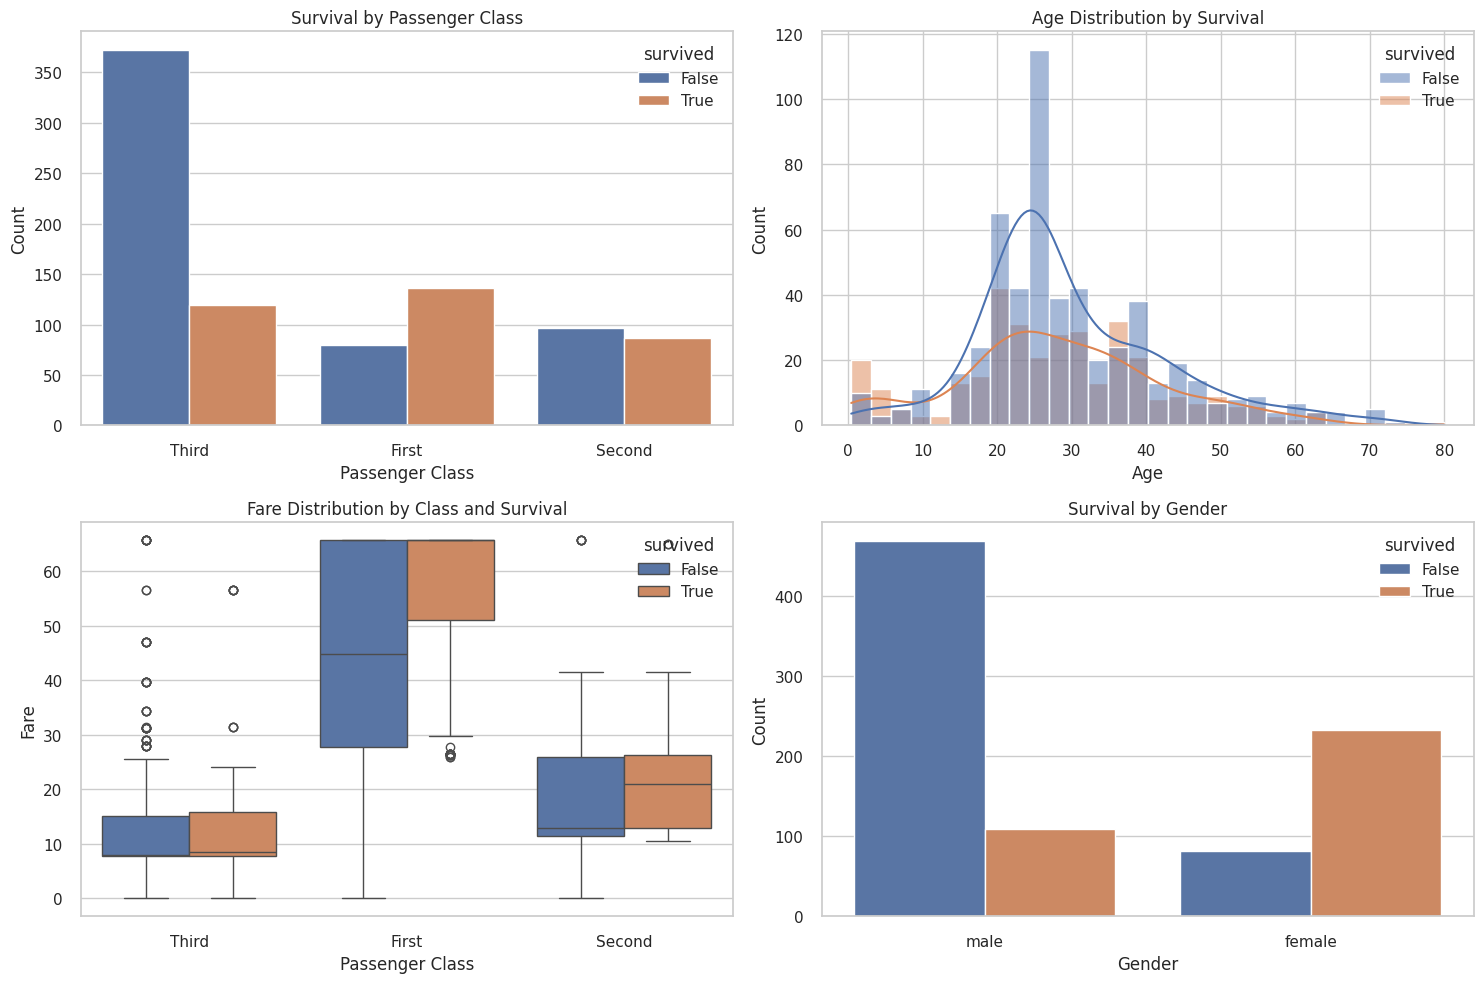


=== Correlation Analysis ===


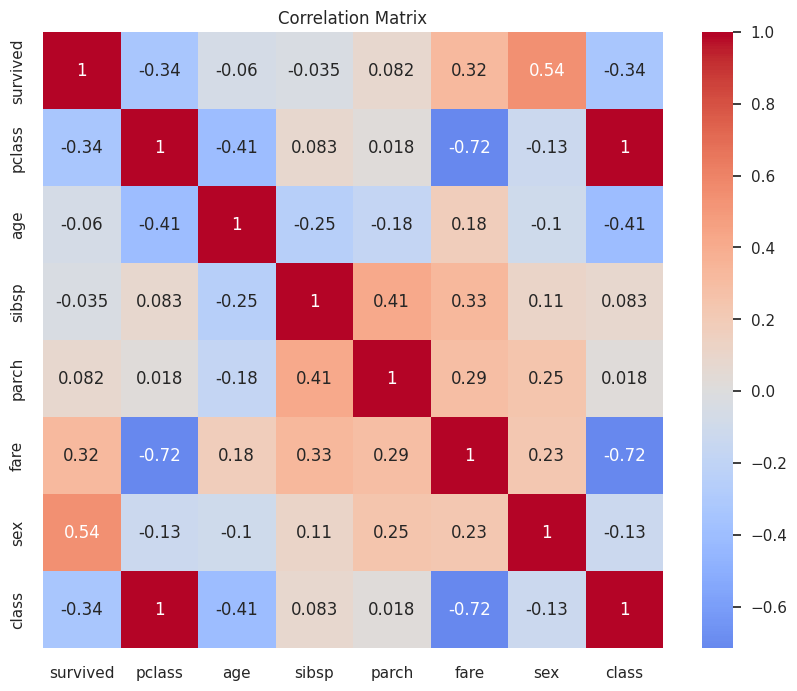


=== Family Size Analysis ===
family_size
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: survived, dtype: float64


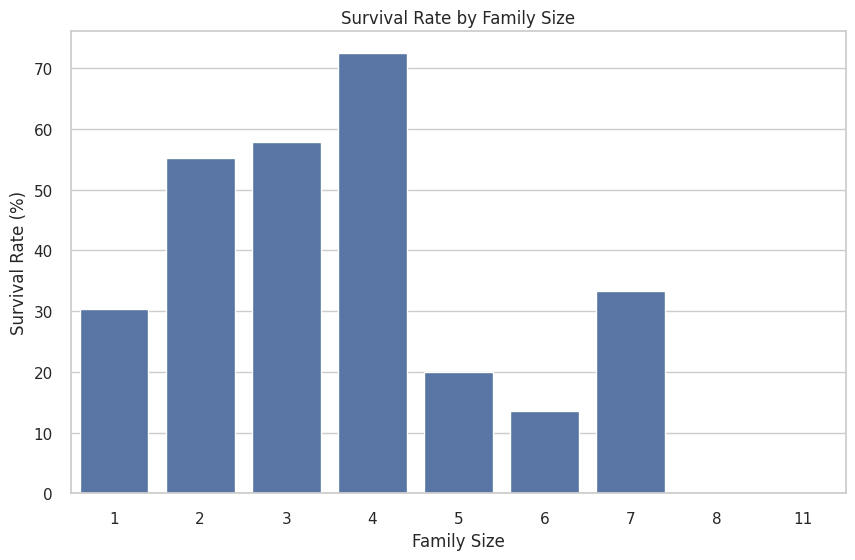

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualization
plt.style.use('seaborn-v0_8')  # Updated style name
sns.set_theme(style="whitegrid")  # Using seaborn's built-in theme

# Load the cleaned data
df = pd.read_csv('titanic_final.csv')

# 1. Basic Information
print ("\n=== Basic Information ===" )
display(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
#print(f"Number of columns: {df.shape[1]}")
print("\nData Types:")
print(df.dtypes)

# 2. Summary Statistics
print("\n=== Summary Statistics ===")
print(df.describe())

# 3. Survival Analysis
print("\n=== Survival Analysis ===")
survival_by_class = df.groupby(['class', 'survived']).size().unstack()
survival_by_class['survival_rate'] = survival_by_class[True] / (survival_by_class[True] + survival_by_class[False]) * 100
print(survival_by_class)

# 4. Visualizations
plt.figure(figsize=(15, 10))

# 4.1 Survival by Class
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='class', hue='survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# 4.2 Age Distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='age', hue='survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')

# 4.3 Fare Distribution
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='class', y='fare', hue='survived')
plt.title('Fare Distribution by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

# 4.4 Survival by Gender
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 5. Correlation Analysis
print("\n=== Correlation Analysis ===")
# Convert categorical variables to numeric for correlation
corr_df = df.copy()
corr_df['survived'] = corr_df['survived'].astype(int)
corr_df['sex'] = corr_df['sex'].map({'male': 0, 'female': 1})
corr_df['class'] = corr_df['class'].map({'First': 1, 'Second': 2, 'Third': 3})

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex', 'class']].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 6. Family Size Analysis
print("\n=== Family Size Analysis ===")
df['family_size'] = df['sibsp'] + df['parch'] + 1
family_survival = df.groupby('family_size')['survived'].mean() * 100
print(family_survival)

plt.figure(figsize=(10, 6))
sns.barplot(x=family_survival.index, y=family_survival.values)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate (%)')
plt.show() 

# 4. Machine Learning

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best CV Score: 0.8230178272431793

=== Evaluation ===
Accuracy: 0.8435754189944135

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.90      0.87       105
        True       0.84      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



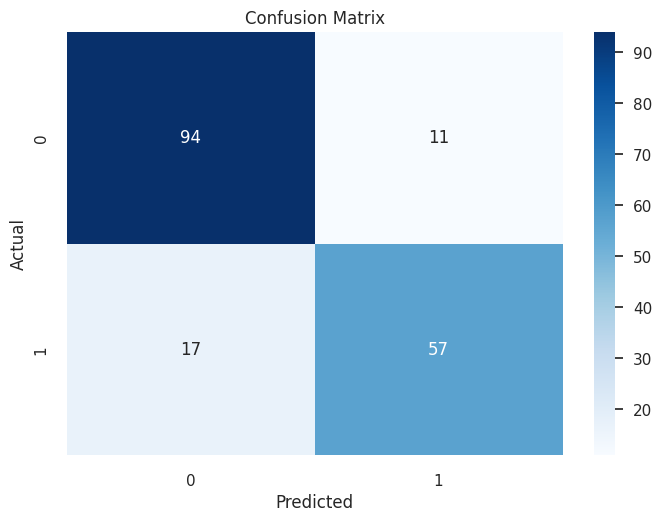

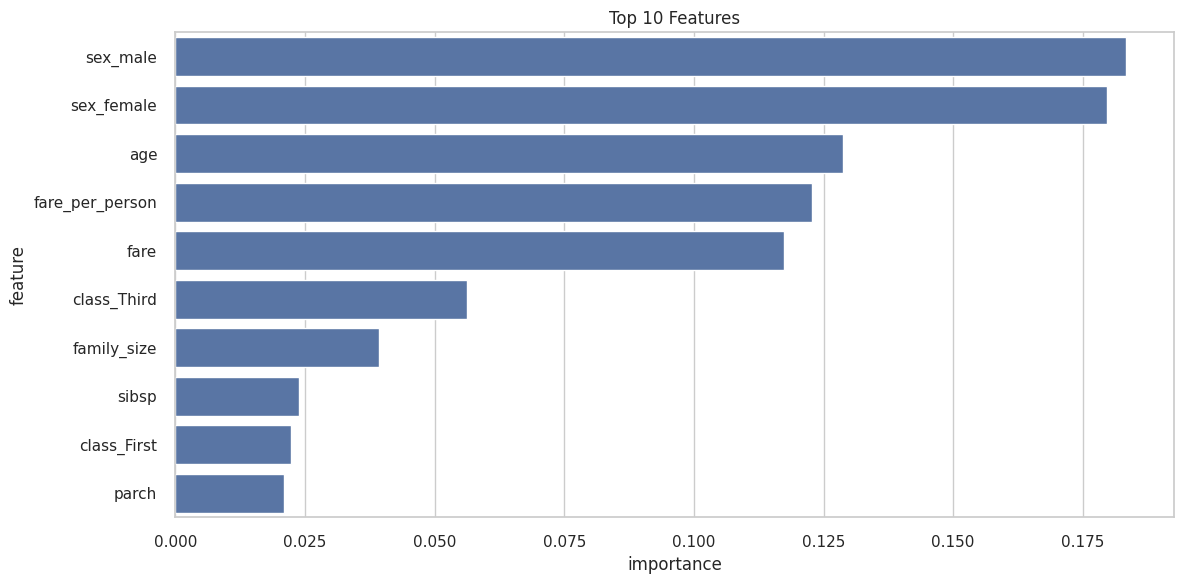


=== Cross-Validation ===
Mean: 0.8350511581193899
Std Dev: 0.027412120051226972
Scores: [0.80446927 0.81460674 0.87078652 0.82022472 0.86516854]
Model saved to 'titanic_model.joblib'


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Set seed
np.random.seed(42)

def load_data(path):
    return pd.read_csv(path)

def create_features(df):
    df['family_size'] = df['sibsp'] + df['parch'] + 1
    df['is_alone'] = (df['family_size'] == 1).astype(int)
    df['fare_per_person'] = df['fare'] / df['family_size']
    df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 100],
                             labels=['child', 'young_adult', 'adult', 'elderly'])
    return df

def build_pipeline(numeric_features, categorical_features):
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    return model

def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("\n=== Evaluation ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_feature_importance(model, numeric_features, categorical_features):
    cat_features = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
    feature_names = numeric_features + list(cat_features)
    importances = model.named_steps['classifier'].feature_importances_
    fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=fi_df.head(10), x='importance', y='feature')
    plt.title('Top 10 Features')
    plt.tight_layout()
    plt.show()

def main():
    df = load_data('titanic_final.csv')
    df = create_features(df)

    target = 'survived'
    numeric_features = ['age', 'fare', 'sibsp', 'parch', 'family_size', 'fare_per_person']
    categorical_features = ['sex', 'class', 'embarked', 'age_group', 'is_alone']

    X = df[numeric_features + categorical_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = build_pipeline(numeric_features, categorical_features)

    param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2]
    }

    grid_search = perform_grid_search(model, param_grid, X_train, y_train)
    best_model = grid_search.best_estimator_

    print("Best Parameters:", grid_search.best_params_)
    print("Best CV Score:", grid_search.best_score_)

    evaluate_model(best_model, X_test, y_test)
    plot_feature_importance(best_model, numeric_features, categorical_features)

    scores = cross_val_score(best_model, X, y, cv=5)
    print("\n=== Cross-Validation ===")
    print("Mean:", scores.mean())
    print("Std Dev:", scores.std())
    print("Scores:", scores)

    joblib.dump(best_model, 'titanic_model.joblib')
    print("Model saved to 'titanic_model.joblib'")

if __name__ == "__main__":
    main()
